# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
corr_matrix = customers.corr()
corr_matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [7]:
high_corr = corr_matrix.unstack().sort_values(ascending = False).drop_duplicates()
high_corr

Delicassen        Delicassen          1.000000
Grocery           Detergents_Paper    0.924641
Milk              Grocery             0.728335
Detergents_Paper  Milk                0.661816
Channel           Detergents_Paper    0.636026
                  Grocery             0.608792
                  Milk                0.460720
Delicassen        Milk                0.406368
Frozen            Delicassen          0.390947
                  Fresh               0.345881
Delicassen        Fresh               0.244690
Grocery           Delicassen          0.205497
Frozen            Milk                0.123994
Fresh             Milk                0.100510
Detergents_Paper  Delicassen          0.069291
Channel           Region              0.062028
Delicassen        Channel             0.056011
Region            Fresh               0.055287
Delicassen        Region              0.045212
Milk              Region              0.032288
Region            Grocery             0.007696
Detergents_Pa

In [8]:
a = high_corr[high_corr>=0.9]
a

Delicassen  Delicassen          1.000000
Grocery     Detergents_Paper    0.924641
dtype: float64

In [9]:
customers.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


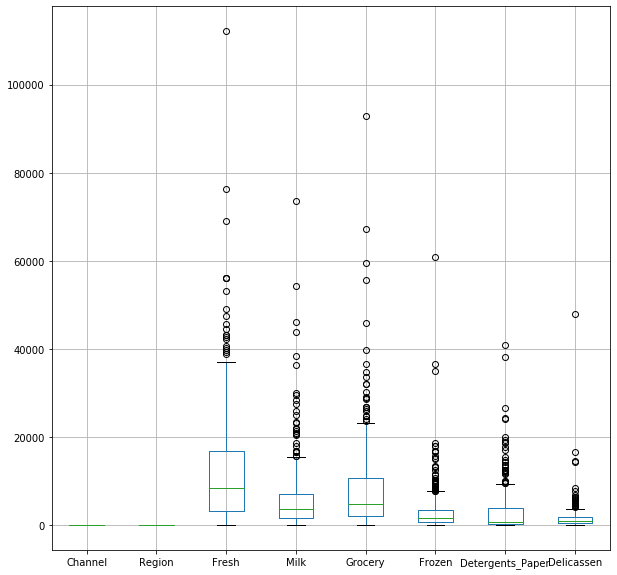

In [10]:
#outliers visualisation

customers.boxplot(figsize=(10, 10))


In [11]:
# Interquartile range to check the percentage of outliers under Q1 or above Q3

Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)
IQR = Q3 - Q1

(((customers < (Q1 - 1.5 * IQR)) | (customers > (Q3 + 1.5 * IQR))).sum() / len(customers))*100

Channel             0.000000
Region              0.000000
Fresh               4.545455
Milk                6.363636
Grocery             5.454545
Frozen              9.772727
Detergents_Paper    6.818182
Delicassen          6.136364
dtype: float64

In [12]:
#skewness

c = customers.skew(axis = 0, skipna = True) 
c

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [13]:
# Your observations here
'''
What does each column mean?
- each column seems to represent characteristcs of produce.

Any categorical data to convert?
- No, all data values are numeric.

Any missing data to remove?
- There are no null values to remove

Column collinearity - any high correlations?
- 'Grocery' and 'Detergents_Paper' do have a correlation of 0.92 which should be considered

Descriptive statistics - any outliers to remove?
- Outliers can be identified my a large discrepancy between mean and std. deviation and/or by boxplots.
Frozen has the highest percentage of outliers

Column-wise data distribution - is the distribution skewed?
- Yes it is, specially for the Delicatessen and Frozen columns

'''

"\nWhat does each column mean?\n- each column seems to represent characteristcs of produce.\n\nAny categorical data to convert?\n- No, all data values are numeric.\n\nAny missing data to remove?\n- There are no null values to remove\n\nColumn collinearity - any high correlations?\n- 'Grocery' and 'Detergents_Paper' do have a correlation of 0.92 which should be considered\n\nDescriptive statistics - any outliers to remove?\n- Outliers can be identified my a large discrepancy between mean and std. deviation and/or by boxplots.\nFrozen has the highest percentage of outliers\n\nColumn-wise data distribution - is the distribution skewed?\n- Yes it is, specially for the Delicatessen and Frozen columns\n\n"

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [14]:
# Your code here
customers = customers.drop(columns = ['Channel','Region'])
customers



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [15]:
#I considered dropping the 'Frozen' column due to the 9% outlier percentage, and 'Grocery' or 'Detergents_Paper' due to their high correlation value. I would have done so if these two conditions applied to the same feature.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [18]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()

customers_scale = scaler.fit_transform(customers)

print('fit: ', scaler.fit(customers))
print('mean: ', scaler.mean_)
print('transform: ', scaler.transform(customers))

fit:  StandardScaler(copy=True, with_mean=True, with_std=True)
mean:  [12000.29772727  5796.26590909  7951.27727273  3071.93181818
  2881.49318182  1524.87045455]
transform:  [[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [19]:
customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [52]:
# Your code here:
from sklearn.cluster import KMeans

kmeans_customers = KMeans(n_clusters=3, random_state=0).fit(customers_scale)

customers['labels'] = kmeans_customers.labels_

customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,2,0
1,7057,9810,9568,1762,3293,1776,0,0
2,6353,8808,7684,2405,3516,7844,0,-1
3,13265,1196,4221,6404,507,1788,2,0
4,22615,5410,7198,3915,1777,5185,2,-1
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2,-1
436,39228,1431,764,4510,93,2346,2,-1
437,14531,15488,30243,437,14841,1867,0,-1
438,10290,1981,2232,1038,168,2125,2,0


Count the values in `labels`.

In [53]:
# Your code here:
customers['labels'].value_counts()

2    316
0    110
1     14
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [54]:
# Your code here


from sklearn.cluster import DBSCAN

dbscan_clusters = DBSCAN(eps=0.5)

customers['labels_DBSCAN'] = (dbscan_clusters.fit(customers_scale)).labels_

customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,2,0
1,7057,9810,9568,1762,3293,1776,0,0
2,6353,8808,7684,2405,3516,7844,0,-1
3,13265,1196,4221,6404,507,1788,2,0
4,22615,5410,7198,3915,1777,5185,2,-1
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2,-1
436,39228,1431,764,4510,93,2346,2,-1
437,14531,15488,30243,437,14841,1867,0,-1
438,10290,1981,2232,1038,168,2125,2,0


Count the values in `labels_DBSCAN`.

In [55]:
# Your code here

customers['labels_DBSCAN'].value_counts()

 0    261
-1    174
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

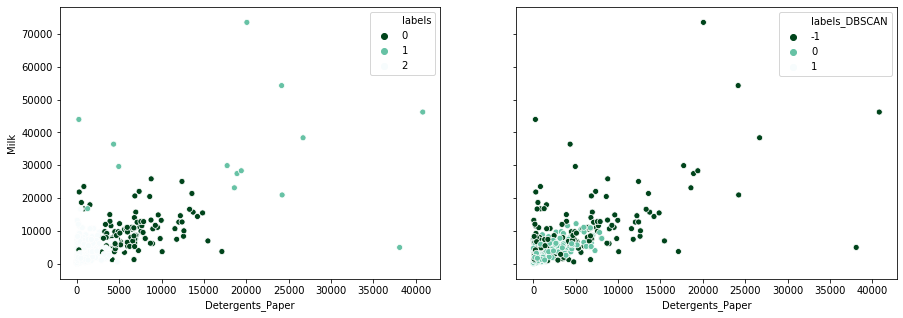

In [56]:
# Your code here:

import seaborn as sb


fig,ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

sb.scatterplot(x = 'Detergents_Paper', y = 'Milk', hue = 'labels', palette = 'BuGn_r', data = customers, ax=ax[0])

sb.scatterplot(x = 'Detergents_Paper', y = 'Milk', hue = 'labels_DBSCAN', palette = 'BuGn_r', data = customers, ax=ax[1])


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

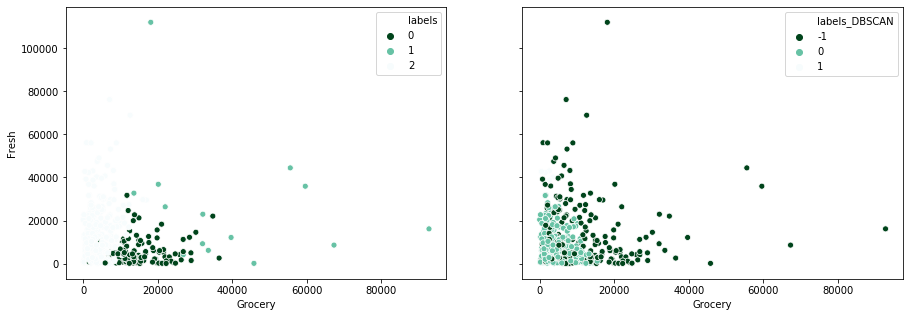

In [57]:
# Your code here:
fig,ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

sb.scatterplot(x = 'Grocery', y = 'Fresh', hue = 'labels', palette = 'BuGn_r', data = customers, ax=ax[0])

sb.scatterplot(x = 'Grocery', y = 'Fresh', hue = 'labels_DBSCAN', palette = 'BuGn_r', data = customers, ax=ax[1])


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

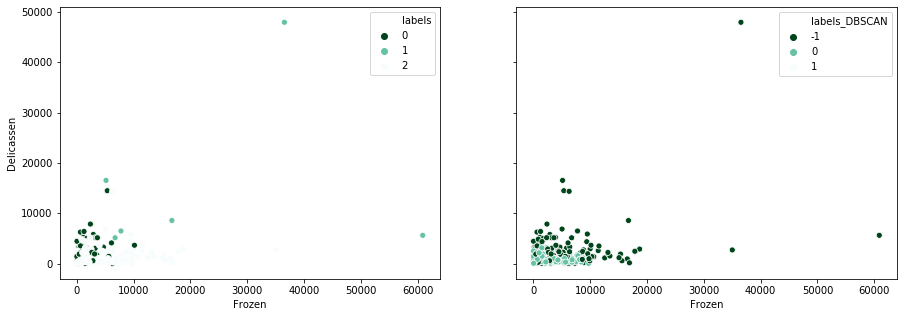

In [58]:
# Your code here:

fig,ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

sb.scatterplot(x = 'Frozen', y = 'Delicassen', hue = 'labels', palette = 'BuGn_r', data = customers, ax=ax[0])

sb.scatterplot(x = 'Frozen', y = 'Delicassen', hue = 'labels_DBSCAN', palette = 'BuGn_r', data = customers, ax=ax[1])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [59]:
# Your code here:
customers.groupby('labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,
0,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909,-0.681818
1,26266.928571,33847.785714,39952.285714,10703.428571,18539.142857,7718.071429,-1.000000
2,13599.164557,3050.806962,3857.965190,3281.047468,854.620253,1168.955696,-0.253165


In [60]:
customers.groupby('labels_DBSCAN').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,1.057471
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,1.731801
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,2.000000


Which algorithm appears to perform better?

In [61]:
# Your observations here

'''
Unsure here, just by looking into the value_counts we can see that KMeans has a better distribution though still not very balanced.

KMeans also seems to provide better clustering in graphs though it does need us to provide the number of cluster required, unlike the DBscan that does this on its own.
'''

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here